In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import math
from scipy import interpolate
plt.rc('font',family='Times New Roman')

In [2]:
L=420e-6
H=80e-6
Pe = 0.01
DO2 = 7.63596e-6
H = 80e-6
w=20e-6
U_0 = Pe*DO2/w
umax=1.5*U_0
Tref=773
rhof=4.4908
Mwf=0.02888
x_O2=0.22


In [3]:
def read(time=0.002,folder="timeCoeff_0.1",file="x-centerline_T_O2_CO2.csv",axis='x',obj='T',refLength=L,refValue=Tref):
    path=f"./{folder}/postProcessing/singleGraph/{str(time)}/{file}"
    df_dbs=pd.read_csv(path)
    df_norm_dbs=pd.DataFrame(columns=["NormalizedLength","NormalizedValue"])
    if obj=="T":
        df_norm_dbs["NormalizedLength"]=df_dbs[axis]/refLength
        df_norm_dbs["NormalizedValue"]=df_dbs[obj]/refValue
    else:
        df_norm_dbs["NormalizedLength"]=df_dbs[axis]/refLength
        df_norm_dbs["NormalizedValue"]=df_dbs[obj]
    return df_norm_dbs

In [4]:
df_norm_dbs_tc_1e_1=read(folder="timeCoeff_0.1")
df_norm_dbs_tc_2e_2=read(folder="timeCoeff_0.02")
df_norm_dbs_tc_1=read(folder="timeCoeff_1")

In [14]:
x_centerline_file_comsol="./timeCoeff_0.1/validate/plots/output-x-centerline.txt"
with open(x_centerline_file_comsol,"r") as fp:
    lines=fp.readlines()
    header=lines[8]
header=re.split(r" +(?![t@(])",header)
header.pop(0)
header[-1]=header[-1].strip()
df_comsol_x_centerline = pd.read_csv(x_centerline_file_comsol, comment='%', sep='\\s+', header=None,names=header)
df_comsol_x_centerline.sort_values(by="x",inplace=True)
df_comsol_x_centerline.reset_index(drop=True,inplace=True)
df_comsol_x_centerline.fillna(0,inplace=True)

comsol_label=f"T (K) @ t={0.002}"
df_norm_comsol=pd.DataFrame(columns=["NormalizedLength","NormalizedValue"])
df_norm_comsol["NormalizedLength"]=df_comsol_x_centerline["x"]/L
df_norm_comsol["NormalizedValue"]=df_comsol_x_centerline[comsol_label]/Tref

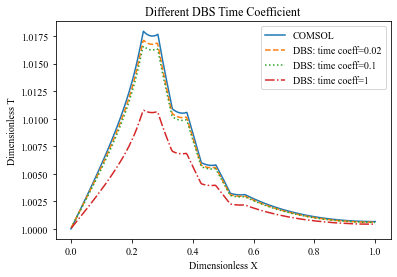

In [16]:
fig, ax = plt.subplots()
ax.plot(df_norm_comsol["NormalizedLength"],df_norm_comsol["NormalizedValue"],lineStyle="-",label="COMSOL")
ax.plot(df_norm_dbs_tc_2e_2["NormalizedLength"],df_norm_dbs_tc_2e_2["NormalizedValue"],lineStyle="--",label="DBS: time coeff=0.02")
ax.plot(df_norm_dbs_tc_1e_1["NormalizedLength"],df_norm_dbs_tc_1e_1["NormalizedValue"],lineStyle=":",label="DBS: time coeff=0.1")
ax.plot(df_norm_dbs_tc_1["NormalizedLength"],df_norm_dbs_tc_1["NormalizedValue"],lineStyle="-.",label="DBS: time coeff=1")
ax.set_xlabel(f"Dimensionless X")
ax.set_ylabel(f"Dimensionless T")
ax.set_title(f"Different DBS Time Coefficient")
ax.legend(loc="upper right")